# IT304S: Contratação de Energia para Grandes Consumidores.
##Prof. Dr. Luiz Carlos Pereira da Silva

# Definição de ciência de dados 

A ciência de dados pode ser definida como um conjunto de técnicas de analise de dados para obter e apresentar informações úteis para um usuario. 

# Metodologia

Uma metodologia muito utilizado para analisar dados é o chamado ``CRISP-DM", por suas siglas em inglês: Cross-Industry Standard Process for Data Mining. O CRISP-DM tem seis etapas que são:

* **Business Understanding:** Definição dos objetivos, declaração do problema, * * pergunta de interesse.
* **Data Understanding:** Utilização de nosso conhecimento para coletar os dados.
* **Data Preparation:** Manipulação de dados para a eliminação de outliers e dados faltantes.
* **Modeling:** Modelo ou abordagem utilizado para estudar o comportamento de nosso sistema a partir de nossos dados.
* **Evaluation:** Avaliação dos resultados obtidos, no contexto se são de ajuda para responder nossa pergunta de interesse.
* **Deployment:** Disponibilizar o análise de dados.

# Business Understanding

* **Definição dos objetivos:** O objetivo do presente notebook é apresentar as variaveis disponíveis no banco de dados UFFS.xlsx.
* **Declaração do problema:** O arquivo UFFS.xlsx, contém as informações disponíveis das planilhas elétricas da UFFS, precisamos de fazer um analize exploratorio dos dados para conhecer os dados disponíveis da UFFS.
* **Perguntas de Interesse:**
Há dados faltantes?

# Data Understanding:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/juliobento9131/IT304S_Trabalho_Parte_2.git

fatal: destination path 'IT304S_Trabalho_Parte_2' already exists and is not an empty directory.


In [ ]:
import pandas as pd

In [ ]:
abas_de_excel =  pd.ExcelFile("/content/drive/Shareddrives/IT304S - Comercialização de Energia Elétrica para Grandes Clientes/Projeto/Planilhas - Universidades/Grupo 15 - UFFS/Preencher_universidade.xlsx")
abas_de_excel.sheet_names

['Apresentação', 'UC1', 'UC2', 'UC3', 'UC4', 'UC5', 'UC6']

In [ ]:
UC4 = abas_de_excel.parse("UC4")
UC4.shape

(79, 30)

In [ ]:
UC4.head()

,DATA,ANO,MÊS,PERÍODO,PIS_PASEP,COFINS,ICMS,DEMANDA_CONTRATADA_P,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,DEMANDA_ISENTA_P,DEMANDA_ISENTA_FP,TAR_TUSD_KW_P,TAR_TUSD_KW_FP,ENERGIA_PONTA,ENERGIA_FPONTA,TAR_TUSD_KWH_P,TAR_TUSD_KWH_FP,TAR_TE_KWH_P,TAR_TE_KWH_FP,REAT_KVAR_PONTA,REAT_KVAR_FPONTA,TAR_REAT_PONTA,TAR_REAT_FPONTA,VALOR_DA_FATURA,CONSUMO_TOTAL,ACRESCIMO_BAMAR,ACRESCIMO_BVERM1,ACRESCIMO_BVERM2
0,-nov-2013,2013,11,32,0.0057,0.0262,0.0,NaN,75,37.0,54.0,NaN,NaN,NaN,7.51,1304,7325,0.58501,0.02043,0.23177,0.14224,0,590.0,0.208472,0.208472,2912.78,8629,0.0,0.0,0
1,-dez-2013,2013,12,27,0.0047,0.0215,0.0,NaN,75,41.0,62.0,NaN,NaN,NaN,7.51,1314,7327,0.58501,0.02043,0.23177,0.14224,0,519.0,0.153719,0.153719,2904.46,8641,0.0,0.0,0
2,-jan-2014,2014,1,30,0.0069,0.0317,0.0,NaN,75,NaN,NaN,NaN,NaN,NaN,7.51,961,6305,0.58501,0.02043,0.23177,0.14224,0,423.0,0.149700,0.149700,2469.11,7266,0.0,0.0,0
3,-fev-2014,2014,2,33,0.0055,0.0298,0.0,NaN,75,NaN,NaN,NaN,NaN,NaN,7.51,1817,11220,0.58501,0.02043,0.23177,0.14224,0,246.0,0.149700,0.149700,4087.73,13037,0.0,0.0,0
4,-mar-2014,2014,3,29,0.0035,0.0163,0.0,NaN,75,NaN,NaN,NaN,NaN,NaN,7.51,822,6464,0.58501,0.02043,0.23177,0.14224,0,252.0,0.149700,0.149700,2454.41,7286,0.0,0.0,0


# Data Preparation:

In [ ]:
import numpy as np

In [ ]:
np.nan + np.nan

nan

In [ ]:
np.nan == np.nan

False

In [ ]:
np.isnan(np.nan)

True

In [ ]:
data = []
for colm in UC4.columns[3:]:
  data.append([colm, UC4.shape[0]-UC4[colm].apply(np.isnan).sum(), UC4[colm].apply(np.isnan).sum(), (UC4[colm].apply(np.isnan).sum()/79)])
dados_faltantes = pd.DataFrame(data, columns=["Variavel", "Quantidade de dados Disponíveis", "Quantidade de dados Faltantes", "Percentagem de Dados Faltantes" ])
dados_faltantes = dados_faltantes[dados_faltantes["Quantidade de dados Faltantes"]>0].sort_values(by=['Quantidade de dados Faltantes'], ascending=False).reset_index(drop=True)
dados_faltantes['Percentagem de Dados Faltantes'] = dados_faltantes['Percentagem de Dados Faltantes'].astype(float).map("{:.2%}".format)
dados_faltantes

,Variavel,Quantidade de dados Disponíveis,Quantidade de dados Faltantes,Percentagem de Dados Faltantes
0,DEMANDA_CONTRATADA_P,0,79,100.00%
1,DEMANDA_ISENTA_P,0,79,100.00%
2,DEMANDA_ISENTA_FP,0,79,100.00%
3,TAR_TUSD_KW_P,0,79,100.00%
4,DEMANDA_REGISTRADA_P,17,62,78.48%
5,DEMANDA_REGISTRADA_FP,75,4,5.06%
6,VALOR_DA_FATURA,78,1,1.27%


## Visualização de Dados Faltantes

In [ ]:
import missingno as msno

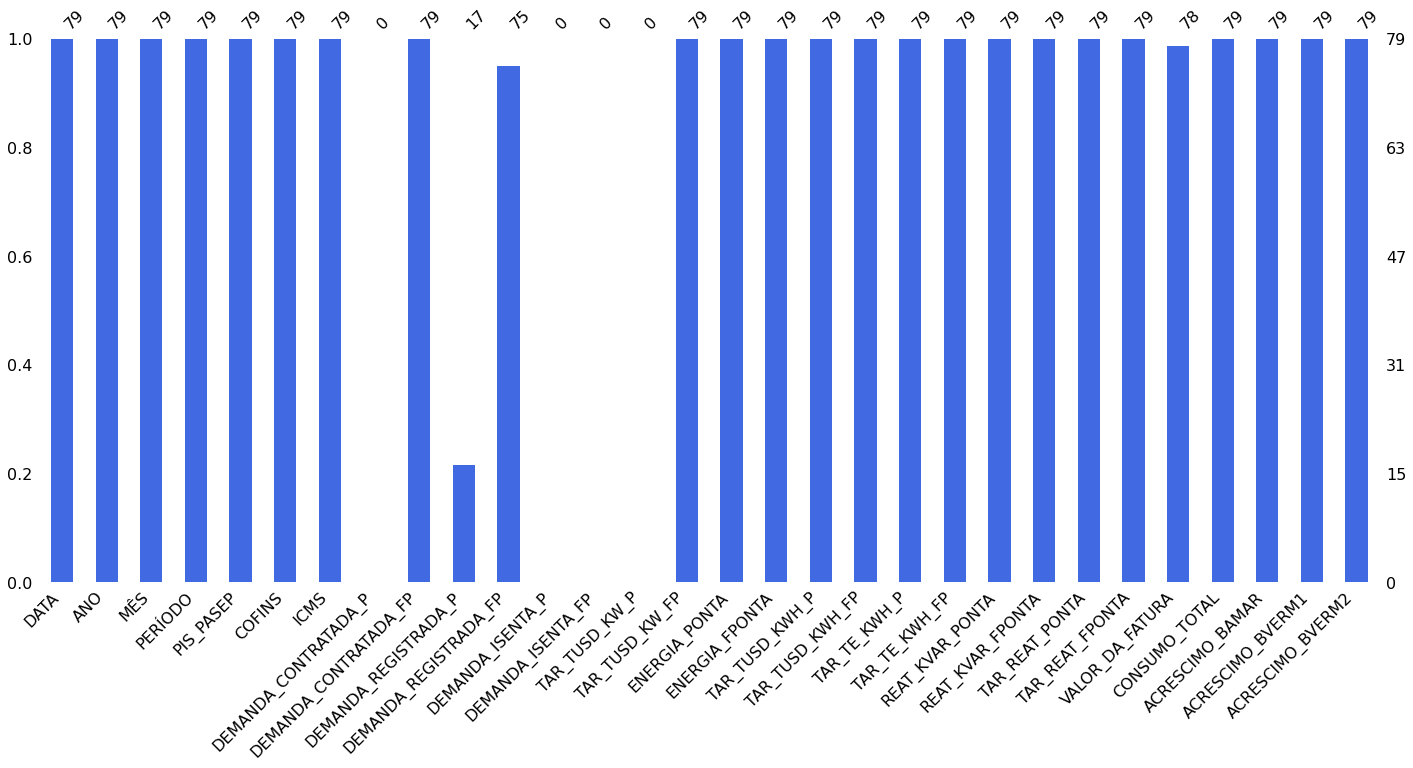

In [ ]:
msno.bar(UC4, color="RoyalBlue") #para visualizar a integridade do datafram

## Matriz de Dados Faltantes

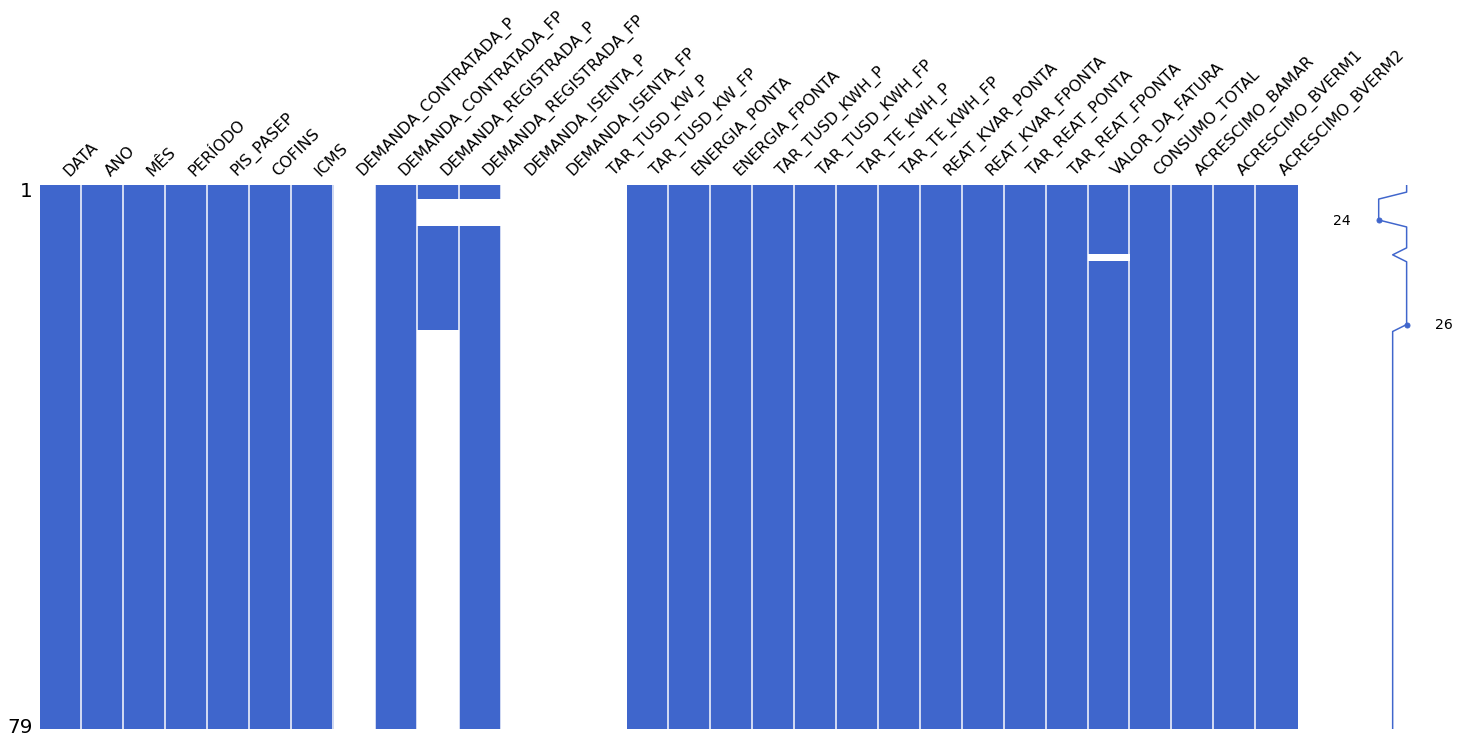

In [ ]:
msno.matrix(UC4, color = (0.25,0.4,0.8))

## Matriz de Correlação de Dados Faltantes

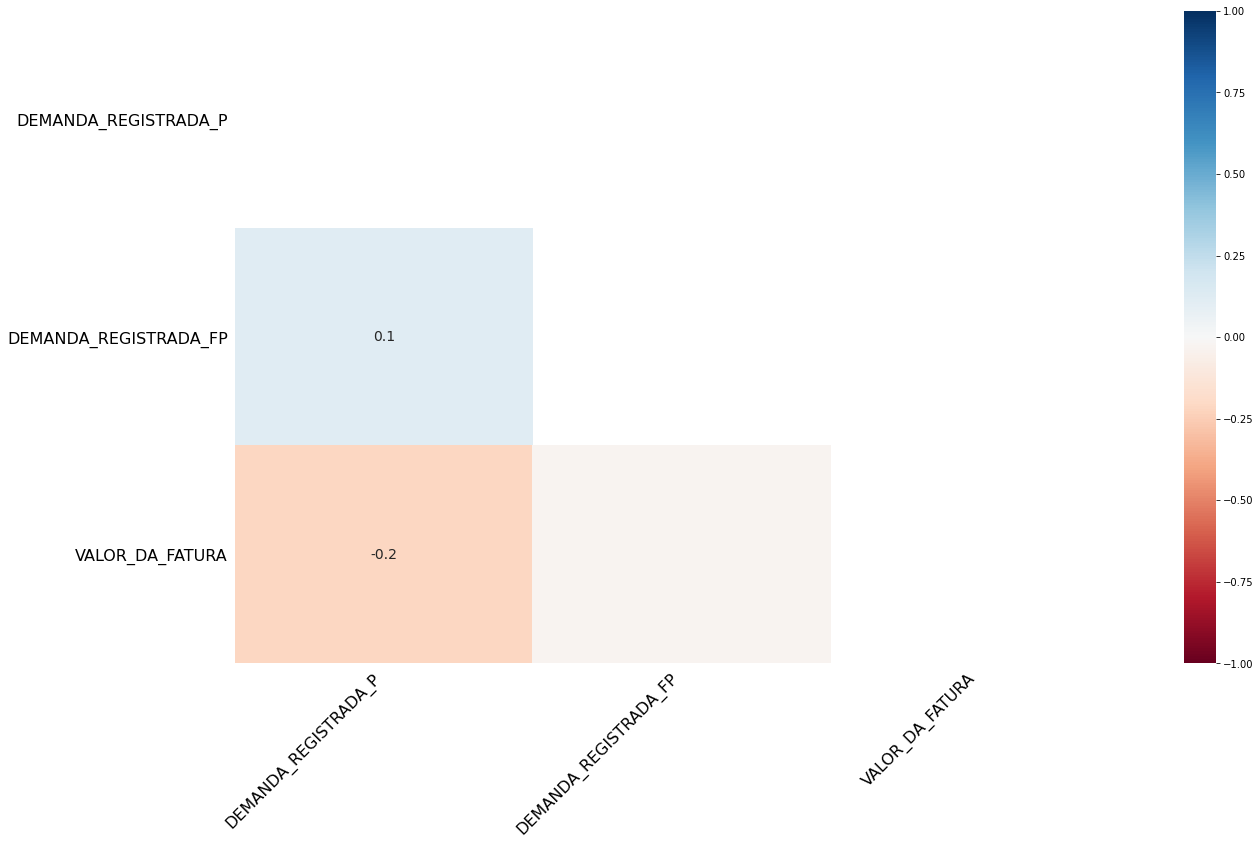

In [ ]:
msno.heatmap(UC4)

### Dendogram de dados Faltantes

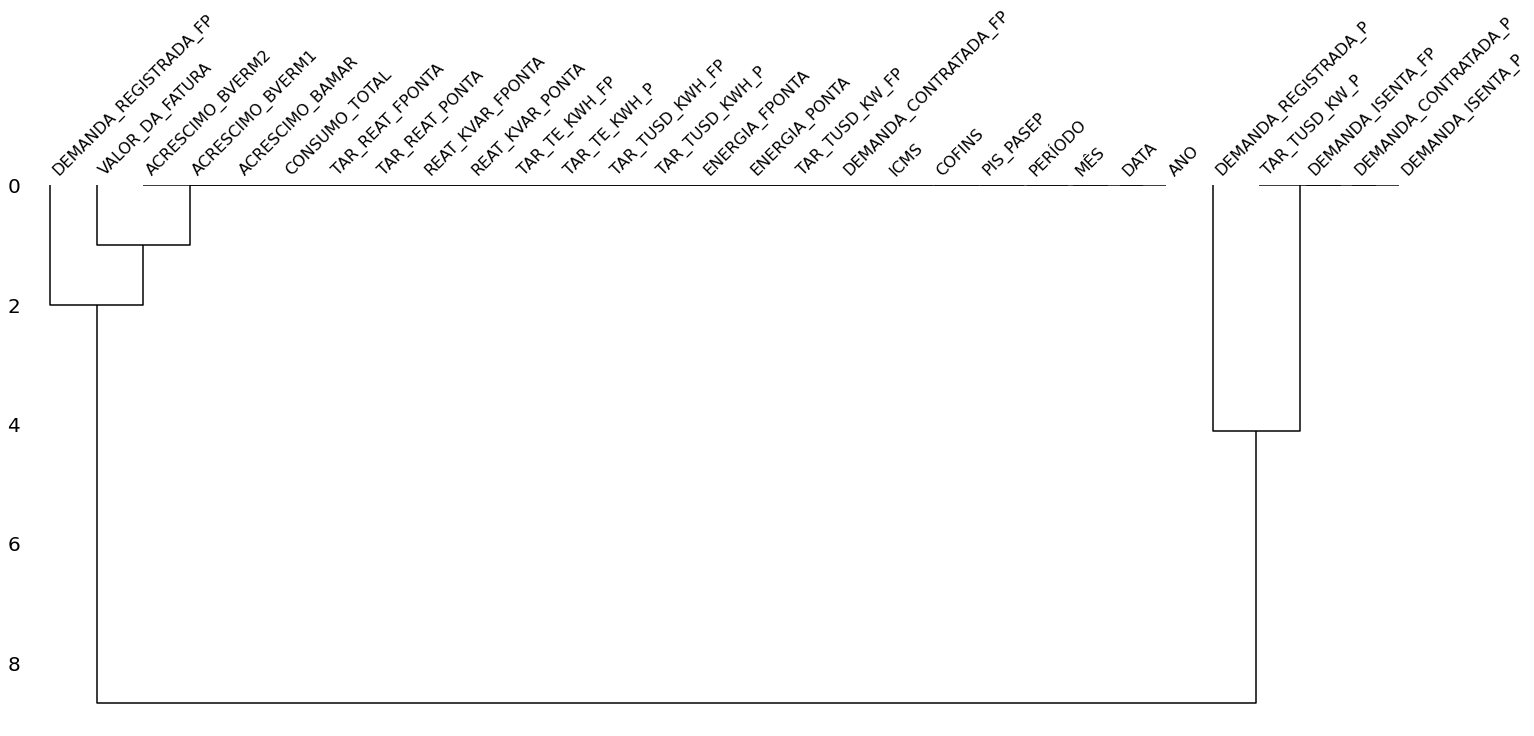

In [ ]:
msno.dendrogram(UC4)

## Eliminação de colunas com excesso de dados Faltantes

In [ ]:
UC4_df = UC4.drop(set(UC4.columns[UC4.isnull().mean() >0.5]), 1)
UC4_df.shape

(79, 25)

## Visualização de Variaveis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

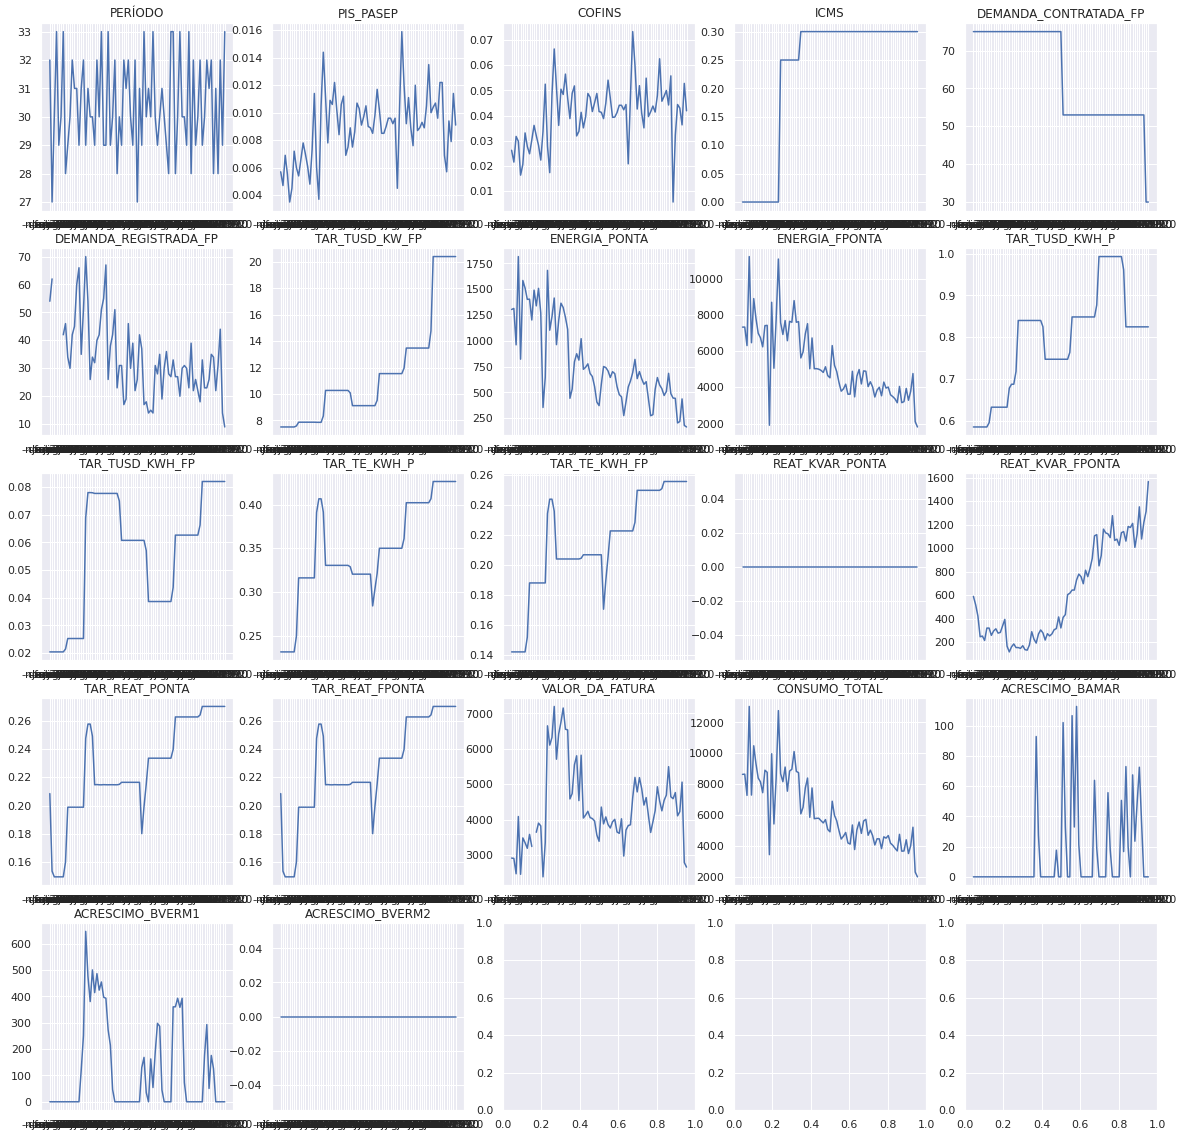

In [ ]:
f, axs = plt.subplots(5, 5,figsize=(20,20))
for i,col in enumerate(UC4_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC4_df.DATA, UC4_df[col])

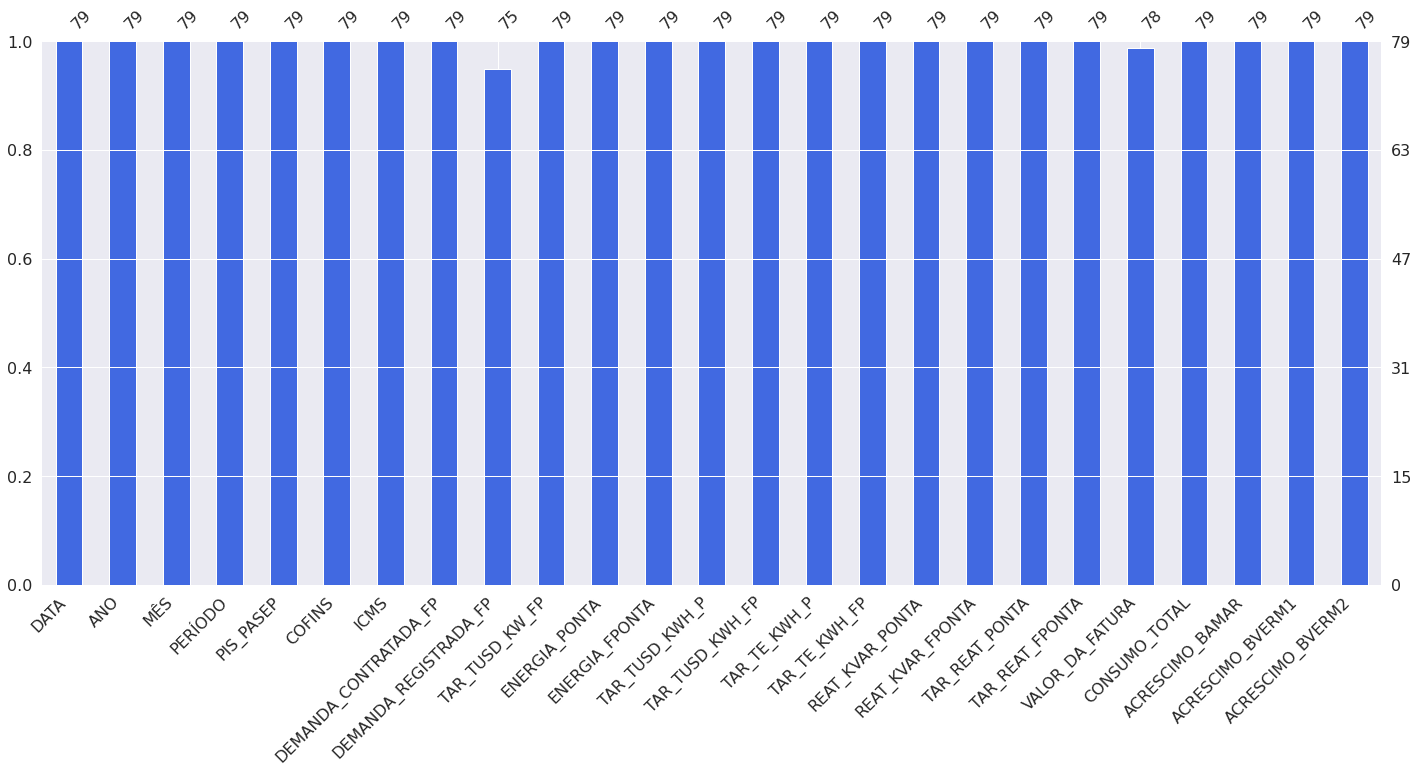

In [ ]:
msno.bar(UC4_df, color="RoyalBlue")

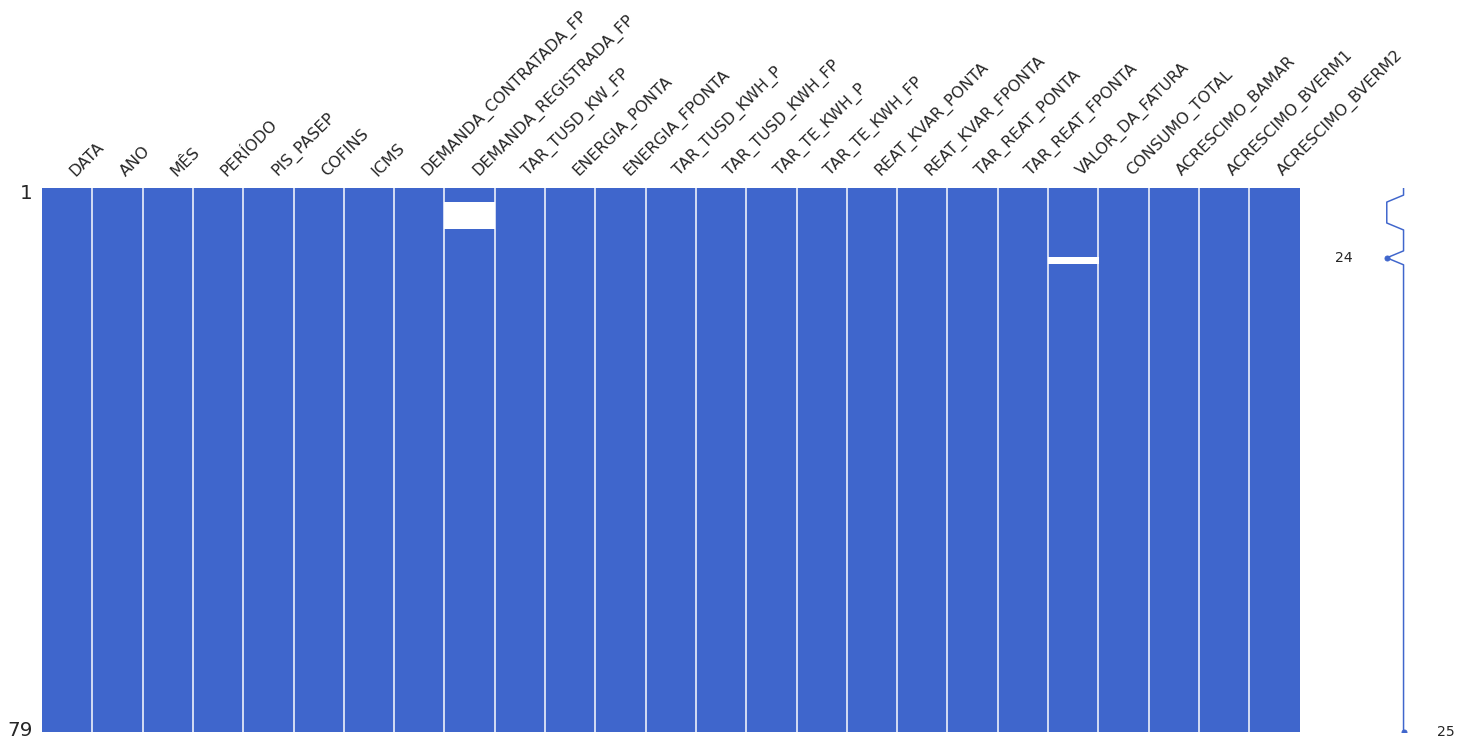

In [ ]:
msno.matrix(UC4_df, color = (0.25,0.4,0.8))

## Tratamento dos dados

Tratamento das colunas com dados faltantes da UC4

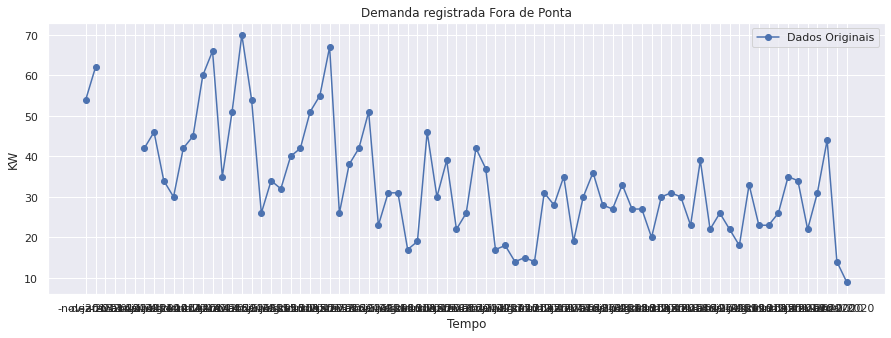

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC4_df.DATA, UC4_df.DEMANDA_REGISTRADA_FP, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend(['Dados Originais'])
_ = plt.title("Demanda registrada Fora de Ponta")
plt.show()


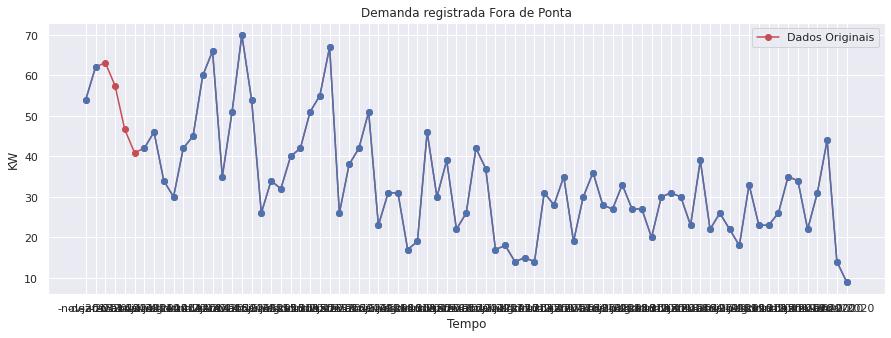

In [ ]:
UC4_quadratica = UC4_df.copy(deep= True)
UC4_quadratica['DEMANDA_REGISTRADA_FP'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC4_quadratica.DATA, UC4_quadratica.DEMANDA_REGISTRADA_FP, marker='o', color="r")
_ = plt.plot(UC4_df.DATA, UC4_df.DEMANDA_REGISTRADA_FP, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend(['Dados Originais'])
_ = plt.title("Demanda registrada Fora de Ponta")
plt.show()

In [ ]:
UC4_df = UC4_quadratica 

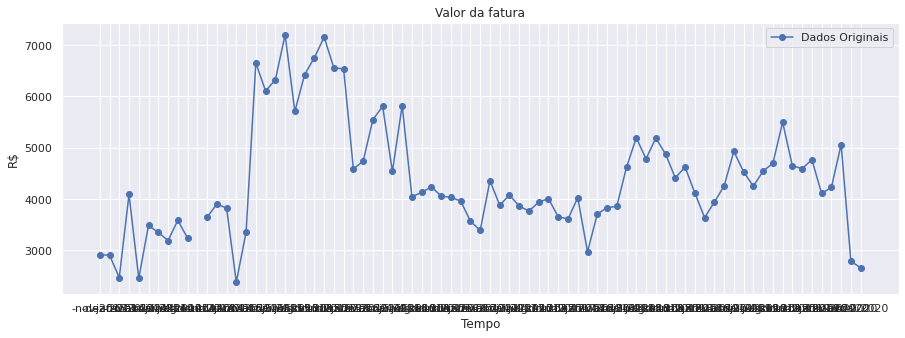

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC4_df.DATA, UC4_df.VALOR_DA_FATURA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("R$")
_ = plt.legend(['Dados Originais'])
_ = plt.title("Valor da fatura")
plt.show()


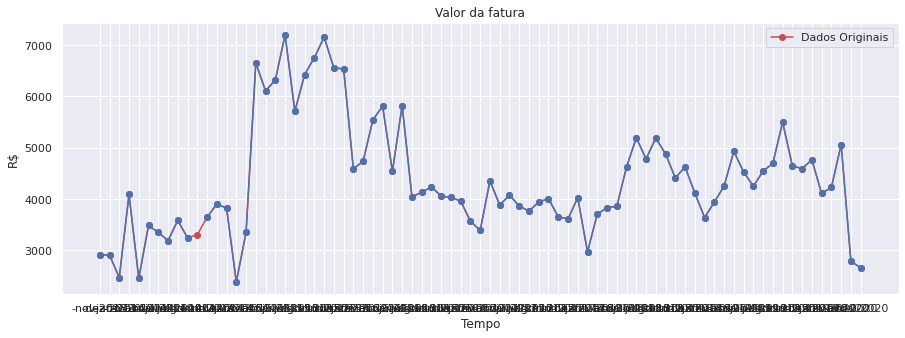

In [ ]:
UC4_quadratica = UC4_df.copy(deep= True)
UC4_quadratica['VALOR_DA_FATURA'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC4_quadratica.DATA, UC4_quadratica.VALOR_DA_FATURA, marker='o', color="r")
_ = plt.plot(UC4_df.DATA, UC4_df.VALOR_DA_FATURA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("R$")
_ = plt.legend(['Dados Originais'])
_ = plt.title("Valor da fatura")
plt.show()

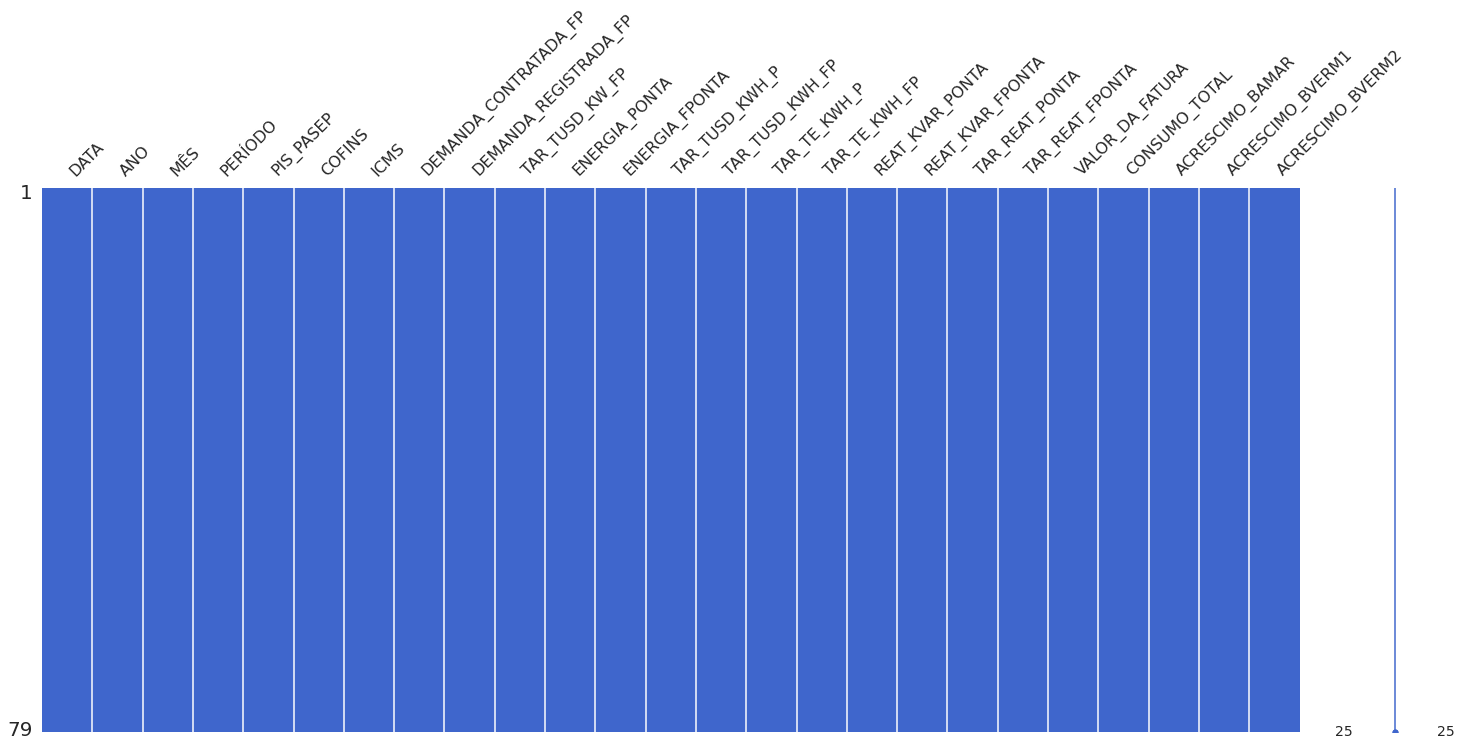

In [ ]:
UC4_df = UC4_quadratica 
msno.matrix(UC4_df, color = (0.25,0.4,0.8))

## Outliers
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Matriz de correlação 

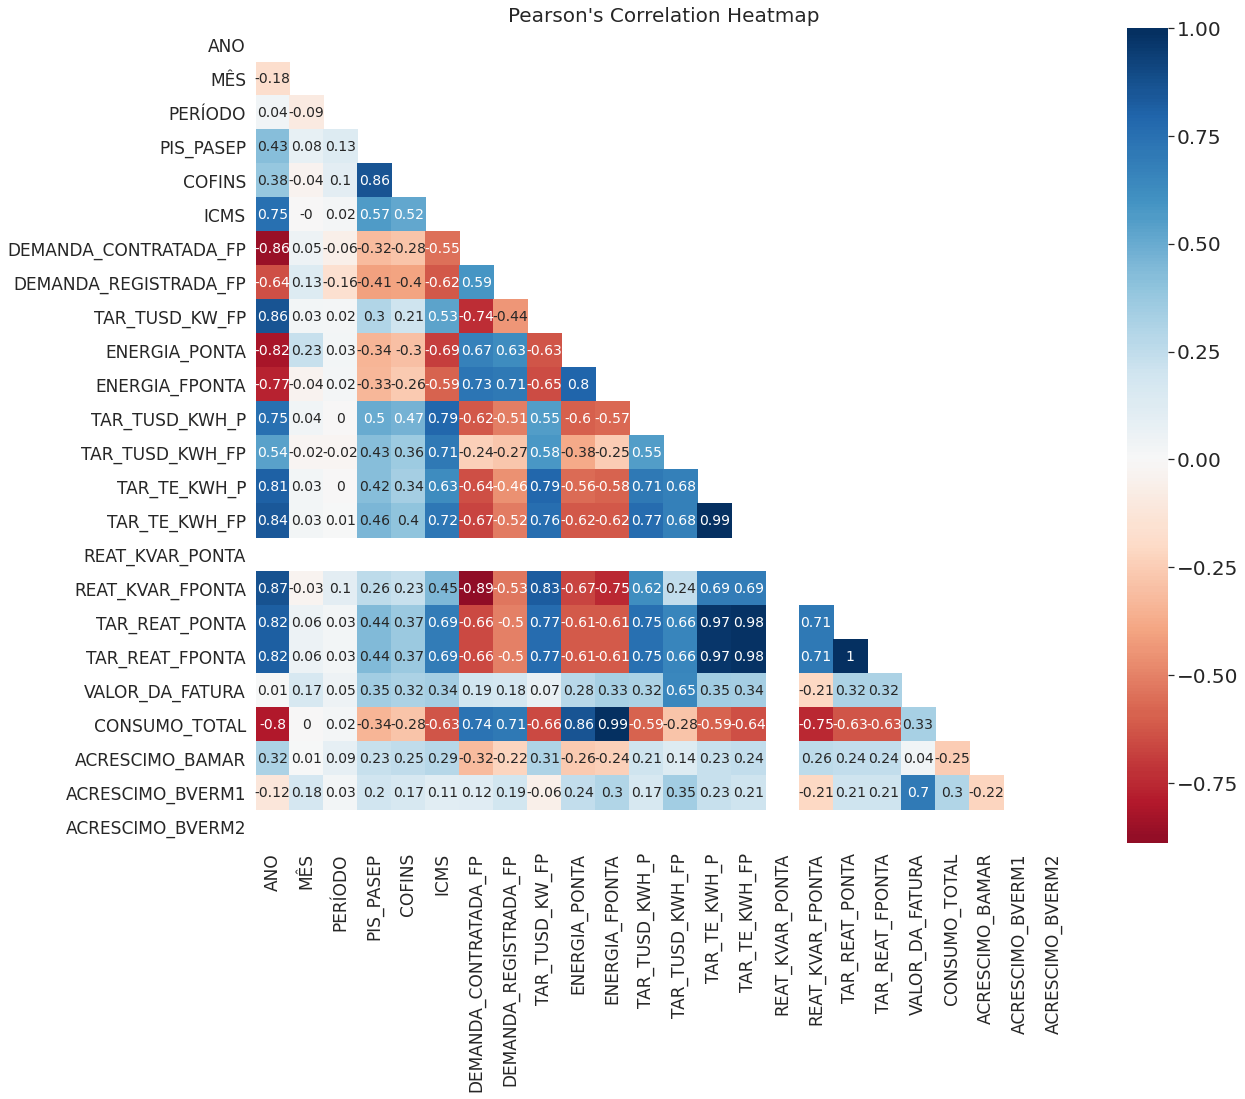

In [ ]:
cor = UC4_df
pear = round(cor.corr(),2)
teste = np.array(pear)
mask = np.zeros_like(pear)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(pear, mask=mask, vmax=1, square=True,center=0,annot=True,annot_kws={"fontsize":14}, cmap="RdBu")
    plt.title('''Pearson's Correlation Heatmap''',fontsize = 20)
    plt.xticks(fontsize=17,rotation=90)
    plt.yticks(fontsize=17,rotation=0)
    cax = plt.gcf().axes[-1] #para alterar fonte do eixo y direito
    cax.tick_params(labelsize=20) #para alterar fonte do eixo y direito

In [ ]:
corr = UC4_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,ANO,MÊS,PERÍODO,PIS_PASEP,COFINS,ICMS,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_FP,TAR_TUSD_KW_FP,ENERGIA_PONTA,ENERGIA_FPONTA,TAR_TUSD_KWH_P,TAR_TUSD_KWH_FP,TAR_TE_KWH_P,TAR_TE_KWH_FP,REAT_KVAR_PONTA,REAT_KVAR_FPONTA,TAR_REAT_PONTA,TAR_REAT_FPONTA,VALOR_DA_FATURA,CONSUMO_TOTAL,ACRESCIMO_BAMAR,ACRESCIMO_BVERM1,ACRESCIMO_BVERM2
ANO,1.00,-0.18,0.04,0.43,0.38,0.75,-0.86,-0.64,0.86,-0.82,-0.77,0.75,0.54,0.81,0.84,nan,0.87,0.82,0.82,0.01,-0.80,0.32,-0.12,nan
MÊS,-0.18,1.00,-0.09,0.08,-0.04,-0.00,0.05,0.13,0.03,0.23,-0.04,0.04,-0.02,0.03,0.03,nan,-0.03,0.06,0.06,0.17,0.00,0.01,0.18,nan
PERÍODO,0.04,-0.09,1.00,0.13,0.10,0.02,-0.06,-0.16,0.02,0.03,0.02,0.00,-0.02,0.00,0.01,nan,0.10,0.03,0.03,0.05,0.02,0.09,0.03,nan
PIS_PASEP,0.43,0.08,0.13,1.00,0.86,0.57,-0.32,-0.41,0.30,-0.34,-0.33,0.50,0.43,0.42,0.46,nan,0.26,0.44,0.44,0.35,-0.34,0.23,0.20,nan
COFINS,0.38,-0.04,0.10,0.86,1.00,0.52,-0.28,-0.40,0.21,-0.30,-0.26,0.47,0.36,0.34,0.40,nan,0.23,0.37,0.37,0.32,-0.28,0.25,0.17,nan
ICMS,0.75,-0.00,0.02,0.57,0.52,1.00,-0.55,-0.62,0.53,-0.69,-0.59,0.79,0.71,0.63,0.72,nan,0.45,0.69,0.69,0.34,-0.63,0.29,0.11,nan
DEMANDA_CONTRATADA_FP,-0.86,0.05,-0.06,-0.32,-0.28,-0.55,1.00,0.59,-0.74,0.67,0.73,-0.62,-0.24,-0.64,-0.67,nan,-0.89,-0.66,-0.66,0.19,0.74,-0.32,0.12,nan
DEMANDA_REGISTRADA_FP,-0.64,0.13,-0.16,-0.41,-0.40,-0.62,0.59,1.00,-0.44,0.63,0.71,-0.51,-0.27,-0.46,-0.52,nan,-0.53,-0.50,-0.50,0.18,0.71,-0.22,0.19,nan
TAR_TUSD_KW_FP,0.86,0.03,0.02,0.30,0.21,0.53,-0.74,-0.44,1.00,-0.63,-0.65,0.55,0.58,0.79,0.76,nan,0.83,0.77,0.77,0.07,-0.66,0.31,-0.06,nan
ENERGIA_PONTA,-0.82,0.23,0.03,-0.34,-0.30,-0.69,0.67,0.63,-0.63,1.00,0.80,-0.60,-0.38,-0.56,-0.62,nan,-0.67,-0.61,-0.61,0.28,0.86,-0.26,0.24,nan


### Método Z score
https://en.wikipedia.org/wiki/Standard_score#/media/File:The_Normal_Distribution.svg

In [ ]:
def z_score (data, treshold =4):
  outliers = []
  treshold = treshold
  mean, std = np.mean(data), np.std(data)
  for i in data:
    zscore = (i-mean)/std
    if np.abs(zscore) > treshold:
      outliers.append(i)
  
  return outliers

In [ ]:
outliers = z_score(UC4_df[["PERÍODO"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["PIS_PASEP"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["COFINS"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["ICMS"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["DEMANDA_CONTRATADA_FP"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["DEMANDA_REGISTRADA_FP"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["TAR_TUSD_KW_FP"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["ENERGIA_PONTA"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["ENERGIA_PONTA"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["TAR_TUSD_KWH_P"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["TAR_TUSD_KWH_FP"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["TAR_TE_KWH_P"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["TAR_TE_KWH_FP"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["REAT_KVAR_PONTA"]].values, 4)
outliers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


[]

In [ ]:
outliers = z_score(UC4_df[["REAT_KVAR_FPONTA"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["TAR_REAT_PONTA"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["TAR_REAT_FPONTA"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["VALOR_DA_FATURA"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["CONSUMO_TOTAL"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["ACRESCIMO_BAMAR"]].values, 4)
outliers

[]

In [ ]:
outliers = z_score(UC4_df[["ACRESCIMO_BVERM1"]].values, 4)
outliers

[]

## Matriz de Correlação de Dados sem outlier

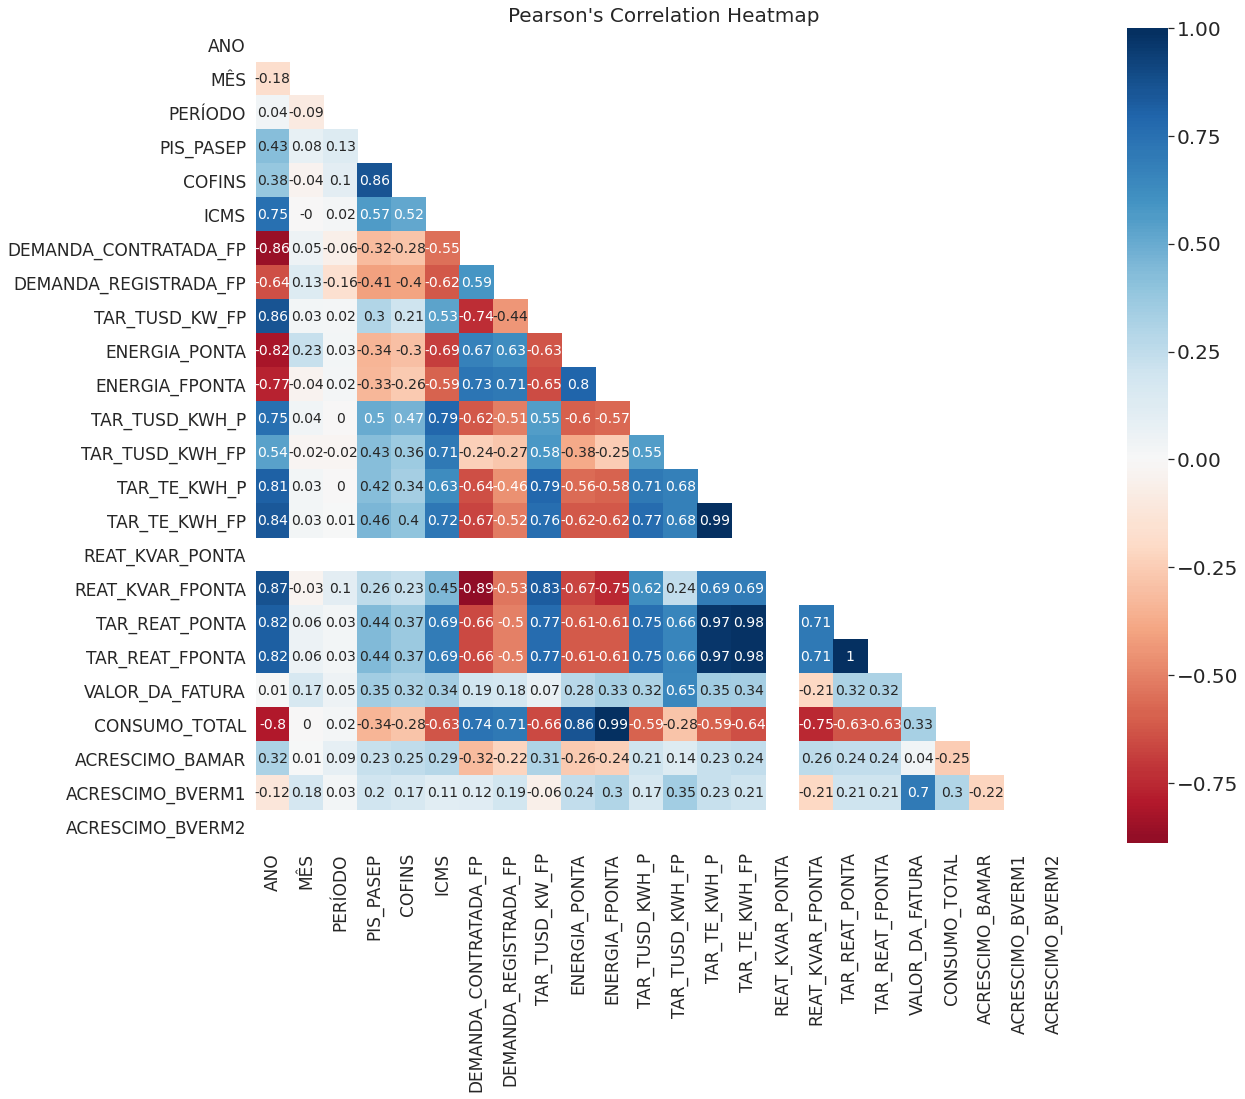

In [ ]:
cor = UC4_df
pear = round(cor.corr(),2)
teste = np.array(pear)
mask = np.zeros_like(pear)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(pear, mask=mask, vmax=1, square=True,center=0,annot=True,annot_kws={"fontsize":14}, cmap="RdBu")
    plt.title('''Pearson's Correlation Heatmap''',fontsize = 20)
    plt.xticks(fontsize=17,rotation=90)
    plt.yticks(fontsize=17,rotation=0)
    cax = plt.gcf().axes[-1] #para alterar fonte do eixo y direito
    cax.tick_params(labelsize=20) #para alterar fonte do eixo y direito

## Exemplo de Diagrama de Dispersão de Variaveis não Correlacionadas e Correlacionadas

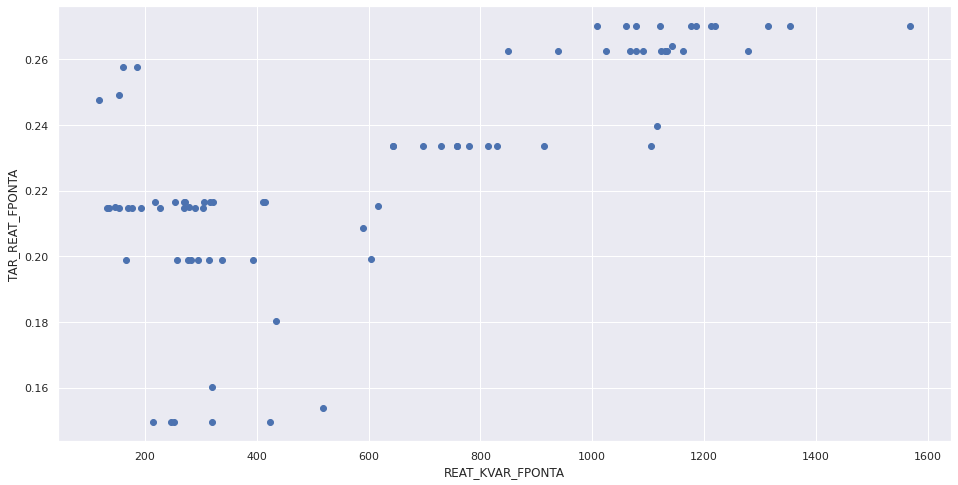

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(UC4_df["REAT_KVAR_FPONTA"], UC4_df["TAR_REAT_FPONTA"])
ax.set_xlabel('REAT_KVAR_FPONTA')
ax.set_ylabel('TAR_REAT_FPONTA')
plt.show()

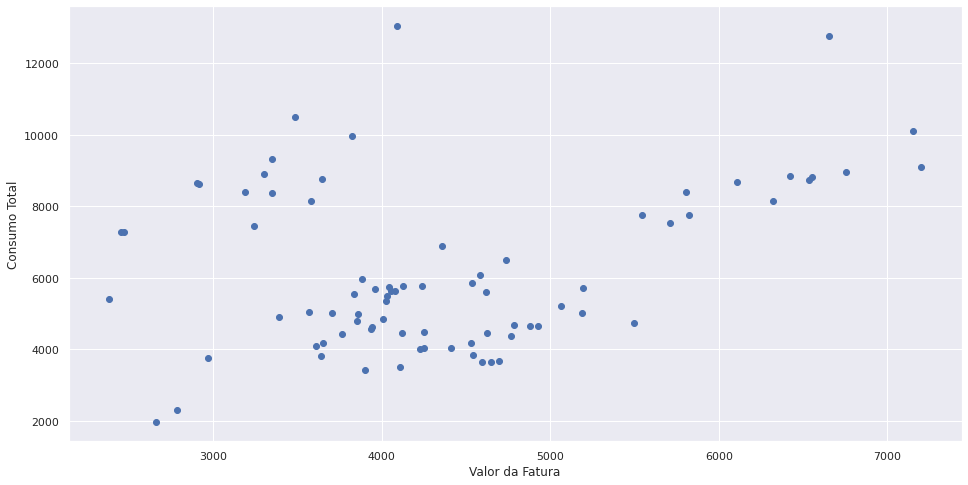

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(UC4_df["VALOR_DA_FATURA"], UC4_df["CONSUMO_TOTAL"])
ax.set_xlabel('Valor da Fatura')
ax.set_ylabel('Consumo Total')
plt.show()

# Exportação para csv

In [ ]:
#import glob
#from google.colab import files

In [ ]:
#UC4_df.to_csv('uc4.csv')
#files.download('uc4.csv')

# Modeling

In [ ]:
df_train = UC4_df["CONSUMO_TOTAL"].iloc[:67]
df_test = UC4_df["CONSUMO_TOTAL"].iloc[67:]

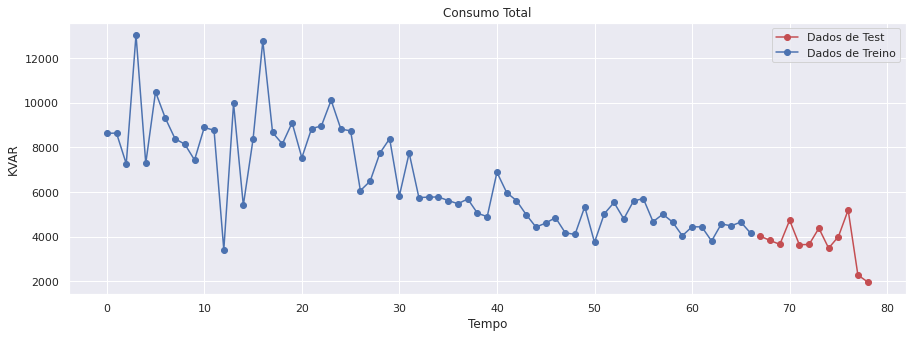

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

In [ ]:
! pip install pmdarima

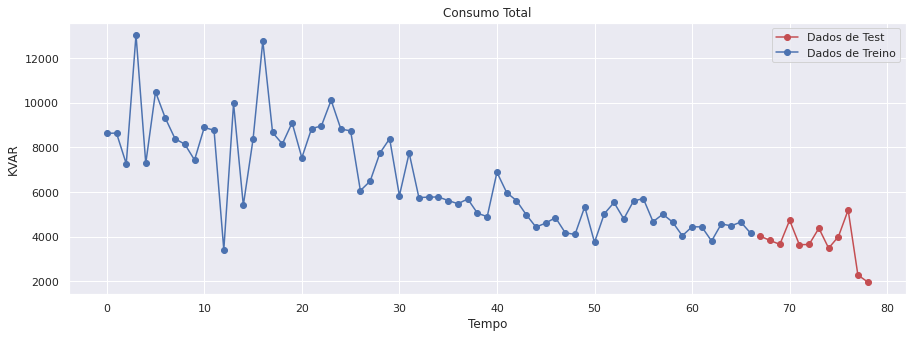

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

In [ ]:
from pmdarima.arima import ADFTest

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
adf_test = ADFTest(alpha=0.05)

In [ ]:
adf_test.should_diff(df_train)

(0.14664382204695287, True)

In [ ]:
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1006.444, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=962.381, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=979.486, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=956.784, Time=0.51 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=955.921, Time=1.09 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=951.900, Time=2.33 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=inf, Time=6.42 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=4.32 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=1.67 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=6.92 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=inf, Time=4.02 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=943.842, Time=2.85 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=946.251, Time=1.35 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=inf, Time=7.3

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   67
Model:             SARIMAX(4, 1, 0)x(5, 1, [1], 12)   Log Likelihood                -457.414
Date:                              Mon, 18 Jan 2021   AIC                            936.828
Time:                                      01:05:21   BIC                            958.706
Sample:                                           0   HQIC                           945.265
                                               - 67                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5936      0.128     -4.635      0.000      -0.845      -0.343
ar.L2         -0.2062      0.125     -1.651      0.099      -0.451       0.039
ar.L3          0.0679      0.184      0.370      0.712      -0.292       0.428
ar.L4         -0.2227      0.127     -1.752      0.080      -0.472       0.026
ar.S.L12      -1.0874      0.626     -1.738      0.082      -2.314       0.139
ar.S.L24      -1.0946      0.384     -2.853      0.004      -1.846      -0.343
ar.S.L36      -1.0657      0.350     -3.047      0.002      -1.751      -0.380
ar.S.L48      -0.9778      0.315     -3.102      0.002      -1.596      -0.360
ar.S.L60      -0.9074      0.196     -4.622      0.000      -1.292      -0.523
ma.S.L12       0.6022      4.190      0.144      0.886      -7.610       8.814
sigma2      2.424e+05   2.31e-05   1.05e+10      0.000    2.42e+05    2.42e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.68
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.89e+26. Standard errors may be unstable.
"""

In [ ]:
predicoes = pd.DataFrame(arima_model.predict(n_periods = 12), index =df_test.index)
predicoes.columns = ['predicoes']

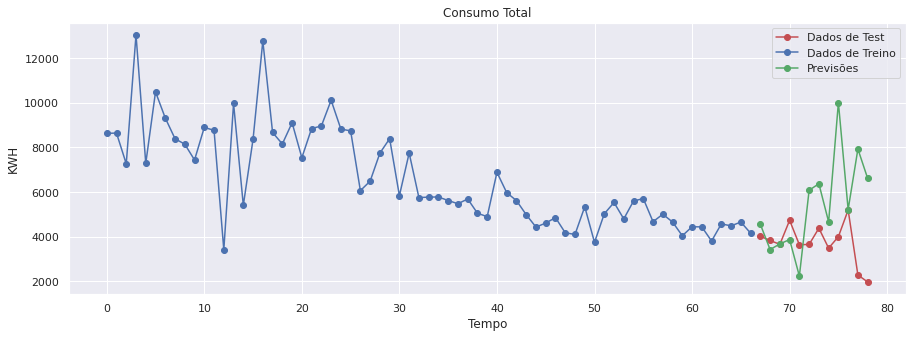

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

# Avaliação

$R M S E=\sqrt{\sum_{i=1}^{n} \frac{\left(\hat{y}_{i}-y_{i}\right)^{2}}{n}}$

In [ ]:
def RMSE(yh, y):
  er = yh - y
  RMSE = sum(er*er/len(er))**0.5
  return RMSE

In [ ]:
np.mean(RMSE(df_test.values, predicoes.values))

2721.05207749043

# Resultado Banco de dados com imputações

In [ ]:
UC4_df.describe()

,ANO,MÊS,PERÍODO,PIS_PASEP,COFINS,ICMS,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_FP,TAR_TUSD_KW_FP,ENERGIA_PONTA,ENERGIA_FPONTA,TAR_TUSD_KWH_P,TAR_TUSD_KWH_FP,TAR_TE_KWH_P,TAR_TE_KWH_FP,REAT_KVAR_PONTA,REAT_KVAR_FPONTA,TAR_REAT_PONTA,TAR_REAT_FPONTA,VALOR_DA_FATURA,CONSUMO_TOTAL,ACRESCIMO_BAMAR,ACRESCIMO_BVERM1,ACRESCIMO_BVERM2
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.0,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.0
mean,2016.632911,6.405063,30.405063,0.008944,0.040955,0.229747,63.556962,34.432765,11.568907,788.392405,5373.240506,0.794231,0.056346,0.347929,0.215005,0.0,618.352456,0.226877,0.226877,4359.051126,6161.632911,14.074051,121.617595,0.0
std,1.942621,3.542848,1.644875,0.002431,0.011698,0.122086,12.202088,13.945789,4.062547,402.440836,1947.882520,0.121992,0.021639,0.055849,0.033556,0.0,408.339952,0.034218,0.034218,1114.951357,2283.099794,28.128067,172.979909,0.0
min,2013.000000,1.000000,27.000000,0.003500,0.005610,0.000000,30.000000,9.000000,7.510000,165.000000,1813.000000,0.585010,0.020430,0.231770,0.142240,0.0,117.000000,0.149700,0.149700,2382.770000,1978.000000,0.000000,0.000000,0.0
25%,2015.000000,3.000000,29.000000,0.007400,0.033700,0.250000,53.000000,24.500000,8.731000,499.000000,3950.500000,0.732622,0.038640,0.320520,0.204170,0.0,269.500000,0.214688,0.214688,3646.580000,4468.500000,0.000000,0.000000,0.0
50%,2017.000000,6.000000,30.000000,0.009100,0.041600,0.300000,75.000000,31.000000,10.270000,683.000000,4908.000000,0.824880,0.060750,0.330550,0.206970,0.0,435.000000,0.216430,0.216430,4106.980000,5600.000000,0.000000,0.000000,0.0
75%,2018.000000,9.500000,32.000000,0.010500,0.048150,0.300000,75.000000,42.000000,13.470000,1107.000000,6934.000000,0.848605,0.077720,0.402050,0.249920,0.0,1064.000000,0.262590,0.262590,4773.745000,8148.500000,17.825000,232.970000,0.0
max,2020.000000,12.000000,33.000000,0.015900,0.073400,0.300000,75.000000,70.000000,20.380000,1817.000000,11220.000000,0.993300,0.082030,0.426280,0.255810,0.0,1569.000000,0.270010,0.270010,7198.800000,13037.000000,112.850000,647.050000,0.0


In [ ]:
UC4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATA                   79 non-null     object 
 1   ANO                    79 non-null     int64  
 2   MÊS                    79 non-null     int64  
 3   PERÍODO                79 non-null     int64  
 4   PIS_PASEP              79 non-null     float64
 5   COFINS                 79 non-null     float64
 6   ICMS                   79 non-null     float64
 7   DEMANDA_CONTRATADA_FP  79 non-null     int64  
 8   DEMANDA_REGISTRADA_FP  79 non-null     float64
 9   TAR_TUSD_KW_FP         79 non-null     float64
 10  ENERGIA_PONTA          79 non-null     int64  
 11  ENERGIA_FPONTA         79 non-null     int64  
 12  TAR_TUSD_KWH_P         79 non-null     float64
 13  TAR_TUSD_KWH_FP        79 non-null     float64
 14  TAR_TE_KWH_P           79 non-null     float64
 15  TAR_TE_K

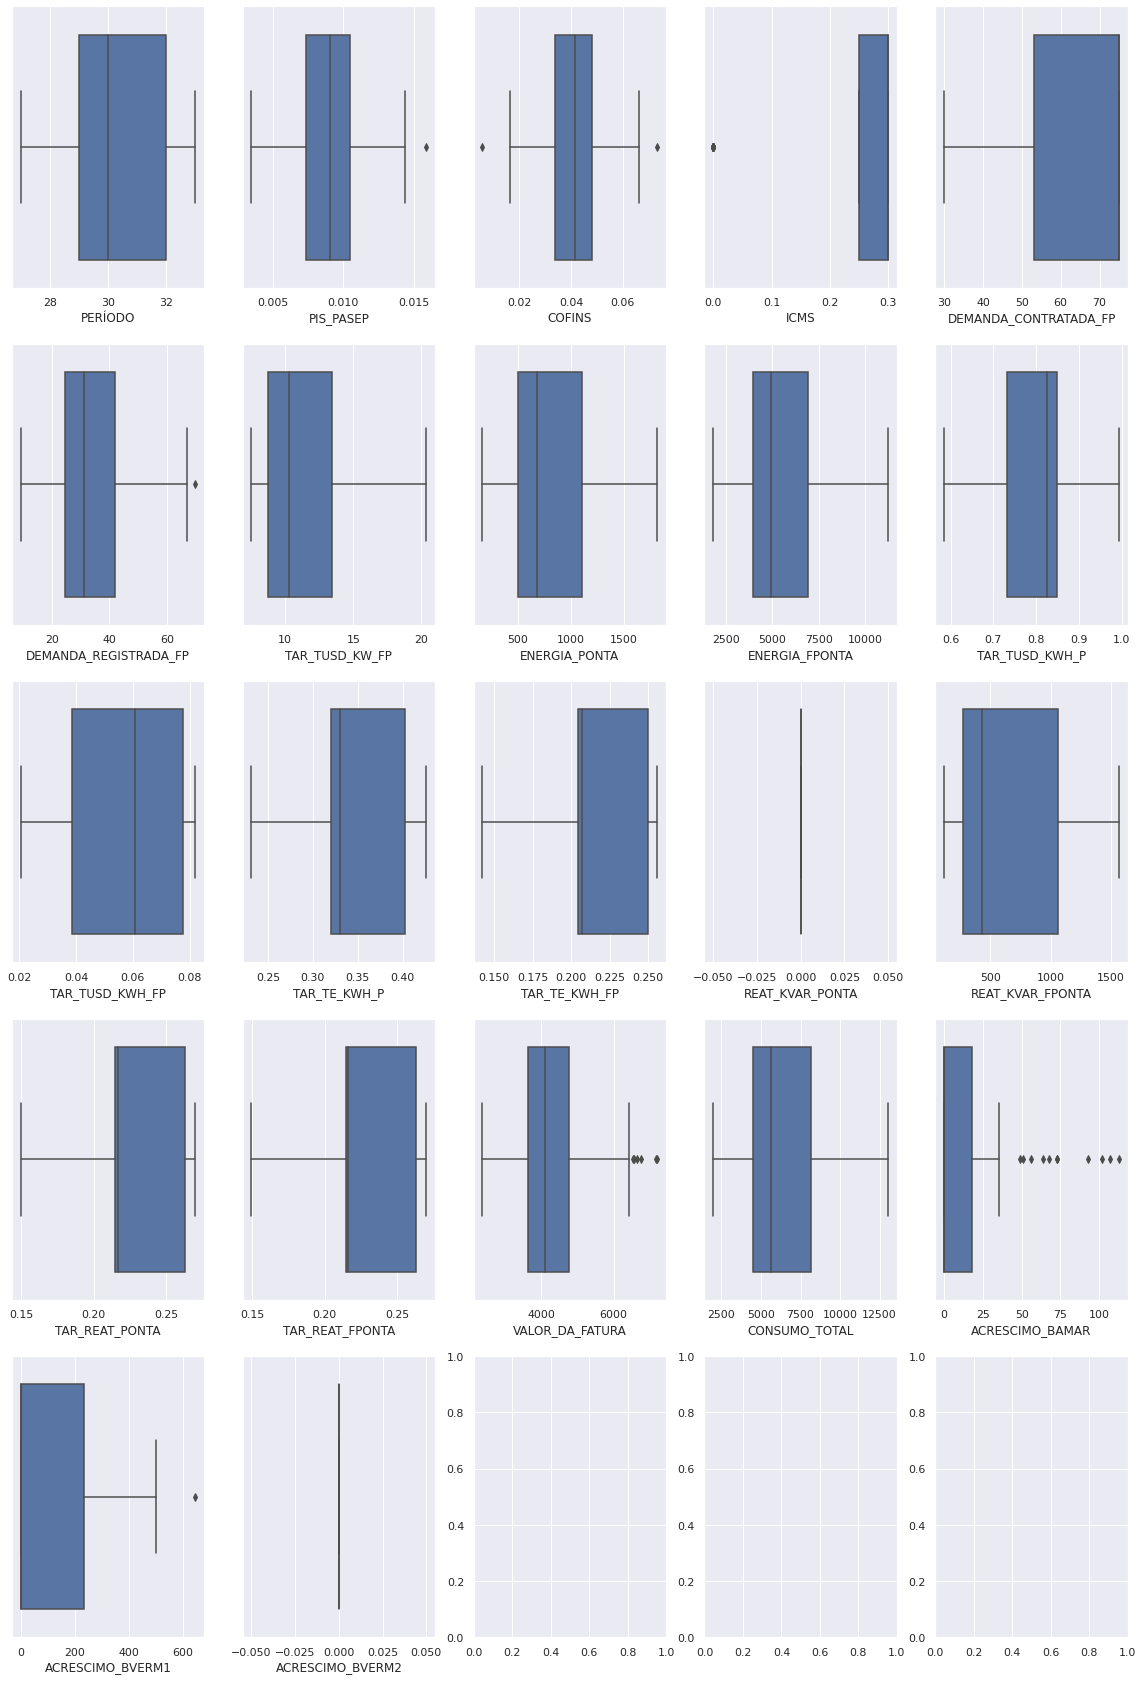

In [ ]:
f, axs = plt.subplots(5, 5,figsize=(20,30))
for i,col in enumerate(UC4_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  sns.boxplot(x=UC4_df[col])

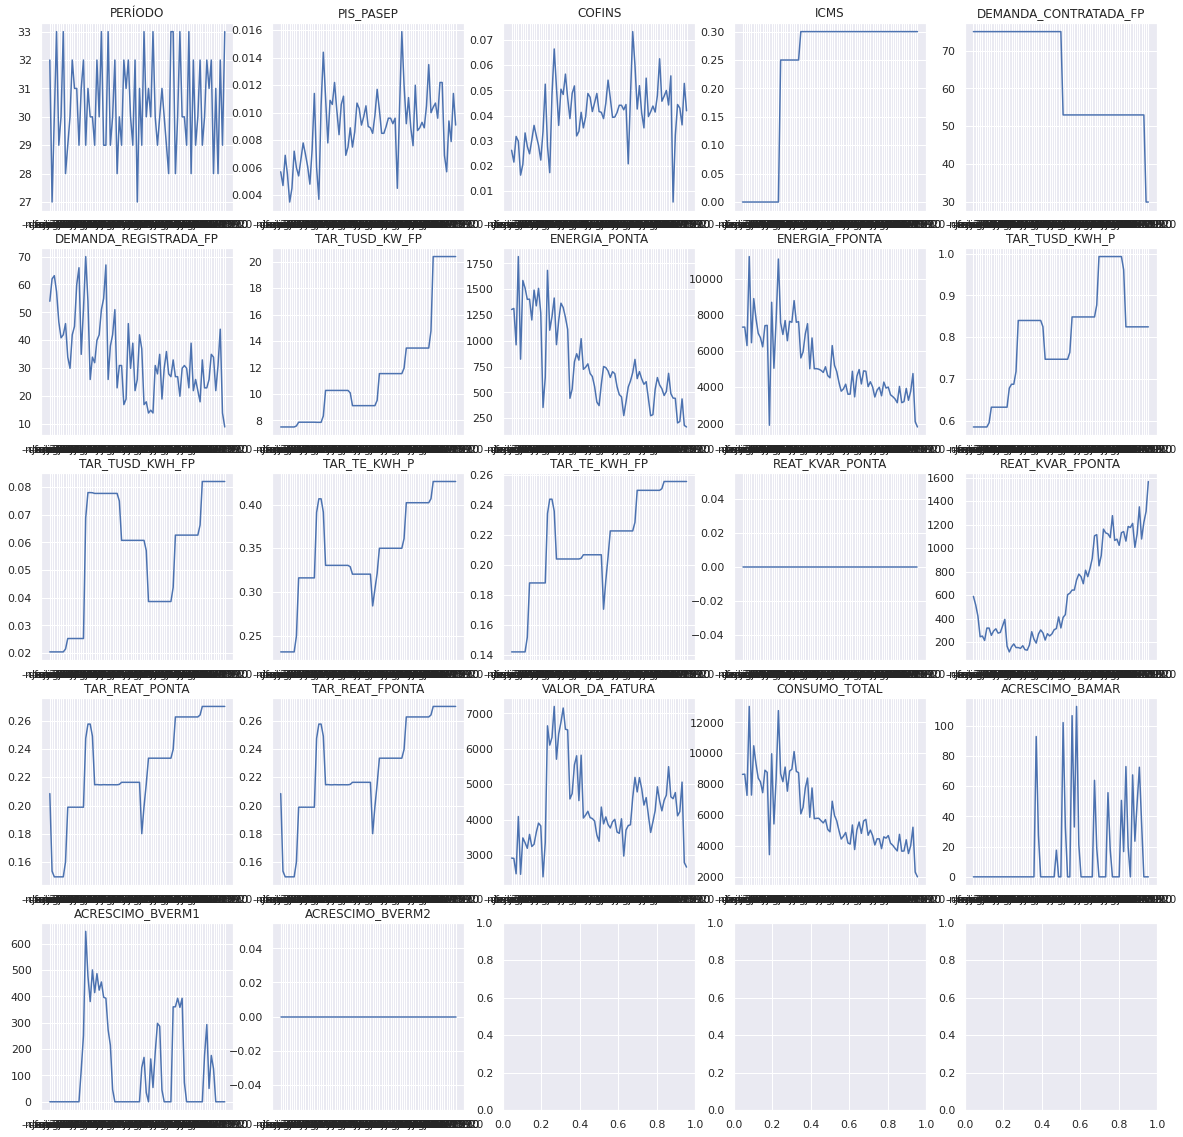

In [ ]:
f, axs = plt.subplots(5, 5,figsize=(20,20))
for i,col in enumerate(UC4_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC4_df.DATA, UC4_df[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


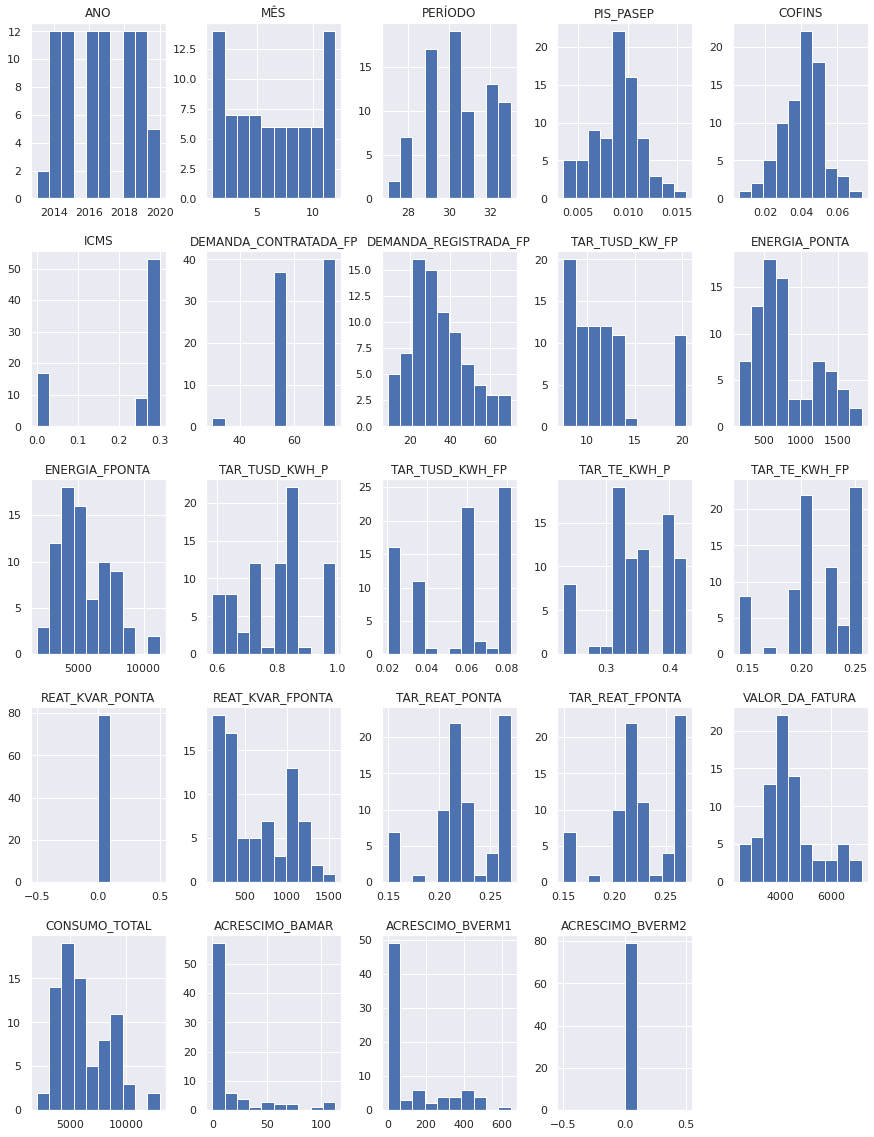

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
UC4_df.hist(ax = ax);

In [ ]:
UC4_df.to_csv(r'UC4.csv', index = False)

In [ ]:
#sns.pairplot(UC1_df[3:], palette='bwr')